# ML Project on covid dataset 

#### Importing the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### reading the data in dataframe

In [2]:
df=pd.read_csv("C:/Users/91862/OneDrive/Desktop/corona_tested_006.csv",low_memory=False)

#### displaying top 5 row of data using head function 

In [3]:
df.head()

,Ind_ID,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
0,1,11-03-2020,TRUE,FALSE,TRUE,FALSE,FALSE,negative,None,None,Abroad
1,2,11-03-2020,FALSE,TRUE,FALSE,FALSE,FALSE,positive,None,None,Abroad
2,3,11-03-2020,FALSE,TRUE,FALSE,FALSE,FALSE,positive,None,None,Abroad
3,4,11-03-2020,TRUE,FALSE,FALSE,FALSE,FALSE,negative,None,None,Abroad
4,5,11-03-2020,TRUE,FALSE,FALSE,FALSE,FALSE,negative,None,None,Contact with confirmed


#### replacing the none values and other values with null values 

In [4]:
df.replace('None',np.nan,inplace=True)
df.replace('other',np.nan,inplace=True)

#### displying null values are present in data  

In [5]:
df.isnull().sum()

Ind_ID                      0
Test_date                   0
Cough_symptoms            252
Fever                     252
Sore_throat                 1
Shortness_of_breath         1
Headache                    1
Corona                   3892
Age_60_above           127320
Sex                     19563
Known_contact               0
dtype: int64

#### slicing the important columns and saving in new variable

In [6]:
final_df=df.iloc[:,2:8]

#### displaying the null values are present in final data 

In [7]:
final_df.isnull().sum()

Cough_symptoms          252
Fever                   252
Sore_throat               1
Shortness_of_breath       1
Headache                  1
Corona                 3892
dtype: int64

#### droping the null values in final data  

In [8]:
final_df.dropna(inplace=True)

#### displying the null values are present in final data  

In [9]:
final_df.isnull().sum()

Cough_symptoms         0
Fever                  0
Sore_throat            0
Shortness_of_breath    0
Headache               0
Corona                 0
dtype: int64

In [10]:
final_df.head()

,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona
0,TRUE,FALSE,TRUE,FALSE,FALSE,negative
1,FALSE,TRUE,FALSE,FALSE,FALSE,positive
2,FALSE,TRUE,FALSE,FALSE,FALSE,positive
3,TRUE,FALSE,FALSE,FALSE,FALSE,negative
4,TRUE,FALSE,FALSE,FALSE,FALSE,negative


####  By seeing the below graph we can say most of the people are corona negative 

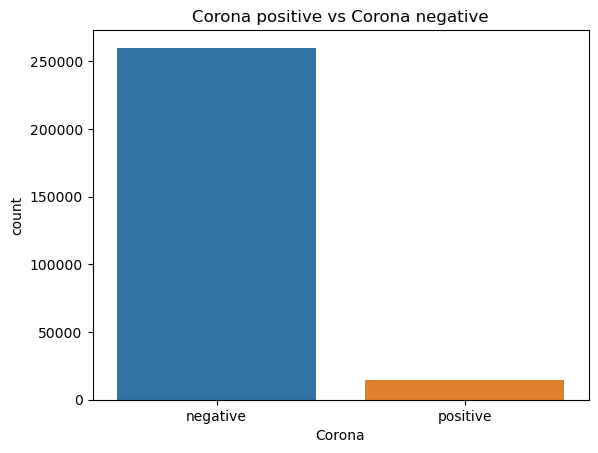

In [11]:
sns.countplot(x=final_df.Corona,data=final_df)
plt.title('Corona positive vs Corona negative')
plt.show()

#### By seeing the below graph we can say corona positive people having the symptoms of cough

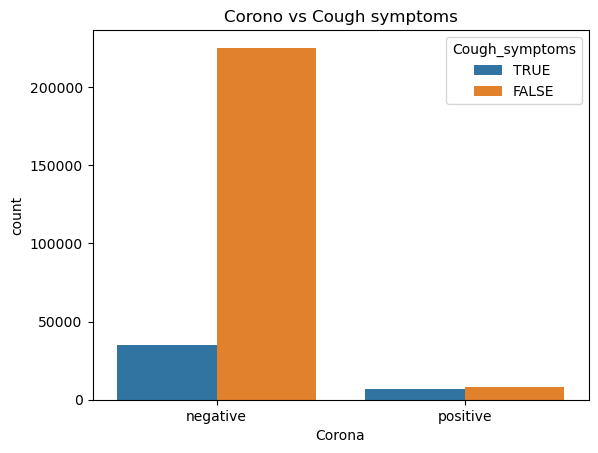

In [12]:
sns.countplot(x=final_df.Corona,data=final_df,hue='Cough_symptoms')
plt.title('Corono vs Cough symptoms')
plt.show()

####   By seeing the below graph we can say corona positive people having the symptoms of fever 

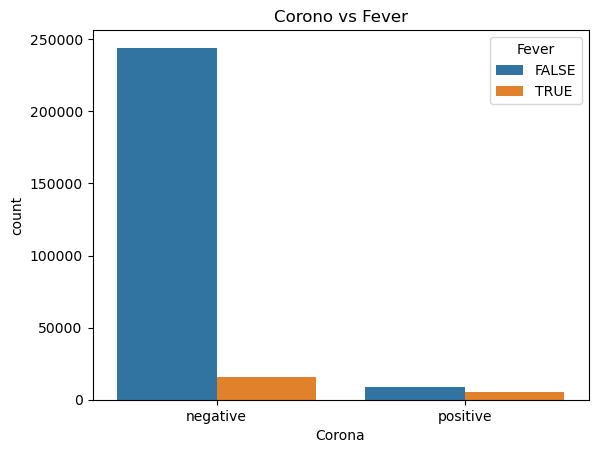

In [13]:
sns.countplot(x=final_df.Corona,data=final_df,hue='Fever')
plt.title('Corono vs Fever')
plt.show()

#### By seeing the below graph we can say corona positive people are having very slight symptoms of sore_throat 

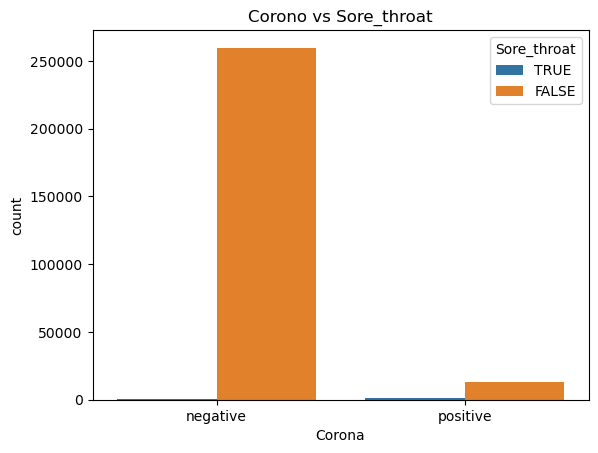

In [14]:
sns.countplot(x=final_df.Corona,data=final_df,hue='Sore_throat')
plt.title('Corono vs Sore_throat')
plt.show()

####  By seeing the below graph we can say corona positive people are having very slight symptoms of shortness of breath

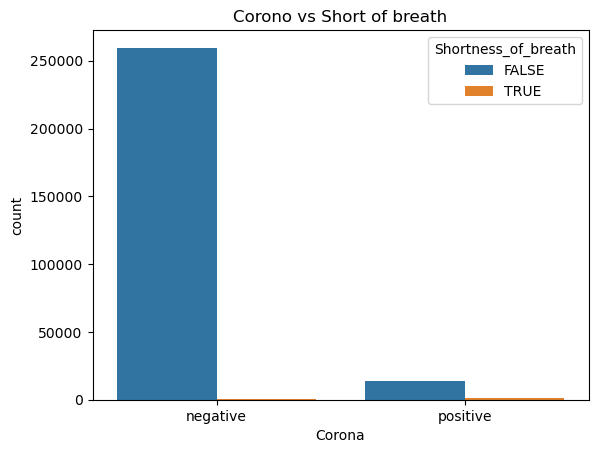

In [15]:
sns.countplot(x=final_df.Corona,data=final_df,hue='Shortness_of_breath')
plt.title('Corono vs Short of breath')
plt.show()

#### By seeing the below graph we can say corona positive people are having very slight symptoms of headache 

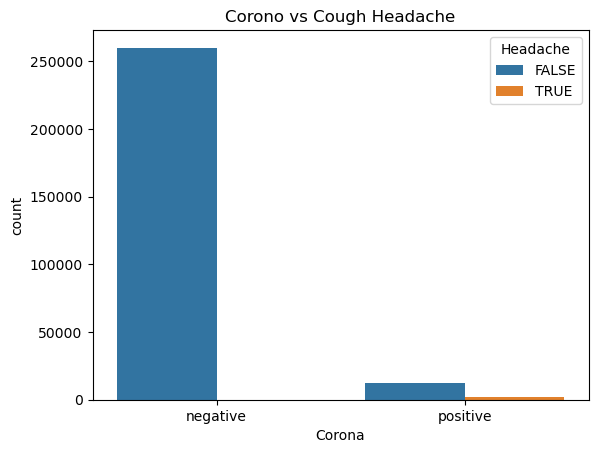

In [16]:
sns.countplot(x=final_df.Corona,data=final_df,hue='Headache')
plt.title('Corono vs Cough Headache')
plt.show()

#### By seeing the above graph we can conclude that the common symptoms are cough and fever for both positive and negative people 

## Encoding the data using the Onehotencoder from sklearn librarie  

#### Encoded using Onehotencoder for independent variable and dependent variable there five symptoms are present which cause the corono positive 

In [17]:
from sklearn.preprocessing import OneHotEncoder
ohe=OneHotEncoder(drop='first')
a=ohe.fit_transform(final_df).toarray()
final_data=pd.DataFrame(a,columns=ohe.get_feature_names_out()).astype(int)

#### After encodeing the final data is present in 1's and 0's format (for symptoms 1's represent True and 0's represent False and for corona variable 1's represent positive and 0's represent negative)

In [18]:
final_data.head()

,Cough_symptoms_TRUE,Fever_TRUE,Sore_throat_TRUE,Shortness_of_breath_TRUE,Headache_TRUE,Corona_positive
0,1,0,1,0,0,0
1,0,1,0,0,0,1
2,0,1,0,0,0,1
3,1,0,0,0,0,0
4,1,0,0,0,0,0


In [19]:
final_data.corr()

,Cough_symptoms_TRUE,Fever_TRUE,Sore_throat_TRUE,Shortness_of_breath_TRUE,Headache_TRUE,Corona_positive
Cough_symptoms_TRUE,1.000000,0.453797,0.115613,0.106330,0.116730,0.196763
Fever_TRUE,0.453797,1.000000,0.122233,0.125840,0.169774,0.266633
Sore_throat_TRUE,0.115613,0.122233,1.000000,0.195181,0.323343,0.278462
Shortness_of_breath_TRUE,0.106330,0.125840,0.195181,1.000000,0.202082,0.233417
Headache_TRUE,0.116730,0.169774,0.323343,0.202082,1.000000,0.367324
Corona_positive,0.196763,0.266633,0.278462,0.233417,0.367324,1.000000


#### by the above table cough_symptoms and fever having good correlation  

#### After encoding sepration of independent variable which are five symptoms and dependent variable which is corona and  independent variable store in X variable and dependent variable which is store in y variable  

In [20]:
X=final_data.iloc[:,0:5]
y=final_data['Corona_positive']

#### X  variable represent the independent variable 

In [21]:
X.head()

,Cough_symptoms_TRUE,Fever_TRUE,Sore_throat_TRUE,Shortness_of_breath_TRUE,Headache_TRUE
0,1,0,1,0,0
1,0,1,0,0,0
2,0,1,0,0,0
3,1,0,0,0,0
4,1,0,0,0,0


#### y variable represent the dependent variable  

In [22]:
y.head()

0    0
1    1
2    1
3    0
4    0
Name: Corona_positive, dtype: int32

#### After sepration of independent variable and dependent variable Using sklearn libraries spliting the data in train and test in 80% in train to train the model and 20% in test to verfiy the model prediciton  

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,stratify=y,random_state=10)

## Performing the logistic regression  

In [24]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()

#### Fitting the x_train and y_train data in model  

In [25]:
model.fit(X_train,y_train)

LogisticRegression()

#### predicting the x_test  

In [26]:
prediction_test=model.predict(X_test)

#### now calculating the accuracy score of the model using sklearn librarie using metrics

In [27]:
from sklearn.metrics import accuracy_score,confusion_matrix
accuracy = accuracy_score(y_test, prediction_test)
print("Accuracy:", accuracy)

Accuracy: 0.9564259842376367


## Performing the same problem statement using Decision tree  

#### Encoded dependent variable and independent variable using the onehotencoder 

In [28]:
from  sklearn.preprocessing import OneHotEncoder
ohe=OneHotEncoder()
a=ohe.fit_transform(final_df).toarray()
final_dt_df=pd.DataFrame(a,columns=ohe.get_feature_names_out()).astype(int)

In [29]:
final_dt_df.head()

,Cough_symptoms_FALSE,Cough_symptoms_TRUE,Fever_FALSE,Fever_TRUE,Sore_throat_FALSE,Sore_throat_TRUE,Shortness_of_breath_FALSE,Shortness_of_breath_TRUE,Headache_FALSE,Headache_TRUE,Corona_negative,Corona_positive
0,0,1,1,0,0,1,1,0,1,0,1,0
1,1,0,0,1,1,0,1,0,1,0,0,1
2,1,0,0,1,1,0,1,0,1,0,0,1
3,0,1,1,0,1,0,1,0,1,0,1,0
4,0,1,1,0,1,0,1,0,1,0,1,0


#### sepration of the independent variable and dependent variable and storeing in x and y variable  

In [30]:
X=final_dt_df.iloc[:,0:10]
y=final_dt_df[['Corona_negative','Corona_positive']]

####  After sepration of independent variable and dependent variable Using sklearn libraries spliting the data in train and test in 80% in train to train the model and 20% in test to verfiy the model prediciton  

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,stratify=y, random_state=42)

#### Performing the Decision tree using sklearn librarie

In [32]:
from sklearn.tree import DecisionTreeClassifier

In [33]:
dtc=DecisionTreeClassifier()

#### Fitting the x_train and y_train data in model  

In [34]:
dtc.fit(X_train,y_train)

DecisionTreeClassifier()

#### Predicting the x_test  

In [35]:
dtc_xtest=dtc.predict(X_test)

#### Calculating the accuracy score of the model and comparing predicted value with y_test using sklearn metrics 

In [36]:
from sklearn.metrics import accuracy_score,confusion_matrix
accuracy = accuracy_score(y_test, dtc_xtest)
print(accuracy)

0.9572086419977794


## Performing random forest on same problem statement  

#### performing encoding using onehot encoder  

In [37]:
from  sklearn.preprocessing import OneHotEncoder
ohe=OneHotEncoder()
a=ohe.fit_transform(final_df).toarray()
final_rf_df=pd.DataFrame(a,columns=ohe.get_feature_names_out()).astype(int)

In [38]:
final_rf_df.head()

,Cough_symptoms_FALSE,Cough_symptoms_TRUE,Fever_FALSE,Fever_TRUE,Sore_throat_FALSE,Sore_throat_TRUE,Shortness_of_breath_FALSE,Shortness_of_breath_TRUE,Headache_FALSE,Headache_TRUE,Corona_negative,Corona_positive
0,0,1,1,0,0,1,1,0,1,0,1,0
1,1,0,0,1,1,0,1,0,1,0,0,1
2,1,0,0,1,1,0,1,0,1,0,0,1
3,0,1,1,0,1,0,1,0,1,0,1,0
4,0,1,1,0,1,0,1,0,1,0,1,0


#### spliting the independent variable and dependent variable  

In [39]:
x=final_rf_df.iloc[:,0:10]
y=final_rf_df[['Corona_negative','Corona_positive']]

#### spliting the data into train and test using sklearn and 80% in train data and 20% in test data  

In [40]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2,stratify=y, random_state=42)

#### Performing the Random forest model using sklearn 

In [41]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()

#### Fitting the x_tain data and y_train data in model  

In [42]:
rfc.fit(X_train,y_train)

RandomForestClassifier()

#### Predicting the x_test  

In [43]:
rfc_xtest=rfc.predict(X_test)

#### Calculating the accuracy score of the model and comparing predicted value with y_test using sklearn metrics  

In [44]:
from sklearn.metrics import accuracy_score,confusion_matrix
accuracy = accuracy_score(y_test, rfc_xtest)
print(accuracy)

0.9572086419977794


### It is a classification problem statement so after applying the Logistic regression,Decision Tree,Random forest  machine learning model three model are giving the 95% of accuracy score  